In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m')

In [2]:
data_path = Path("../data/pca_results")

In [3]:
data_sets = list(data_path.glob("*.pkl"))

In [4]:
data_sets

[PosixPath('../data/pca_results/pca_data_rolling_10_3.pkl'),
 PosixPath('../data/pca_results/pca_data_rolling_10_2.pkl'),
 PosixPath('../data/pca_results/pca_data_normal_2.pkl'),
 PosixPath('../data/pca_results/pca_data_normal_3.pkl'),
 PosixPath('../data/pca_results/pca_data_rolling_20_3.pkl')]

In [5]:
df3r10 = pd.read_pickle(str(data_sets[0]))
df3avg = pd.read_pickle(str(data_sets[4]))
df2r10 = pd.read_pickle(str(data_sets[1]))
df2avg = pd.read_pickle(str(data_sets[2]))

<AxesSubplot:xlabel='timestamp'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
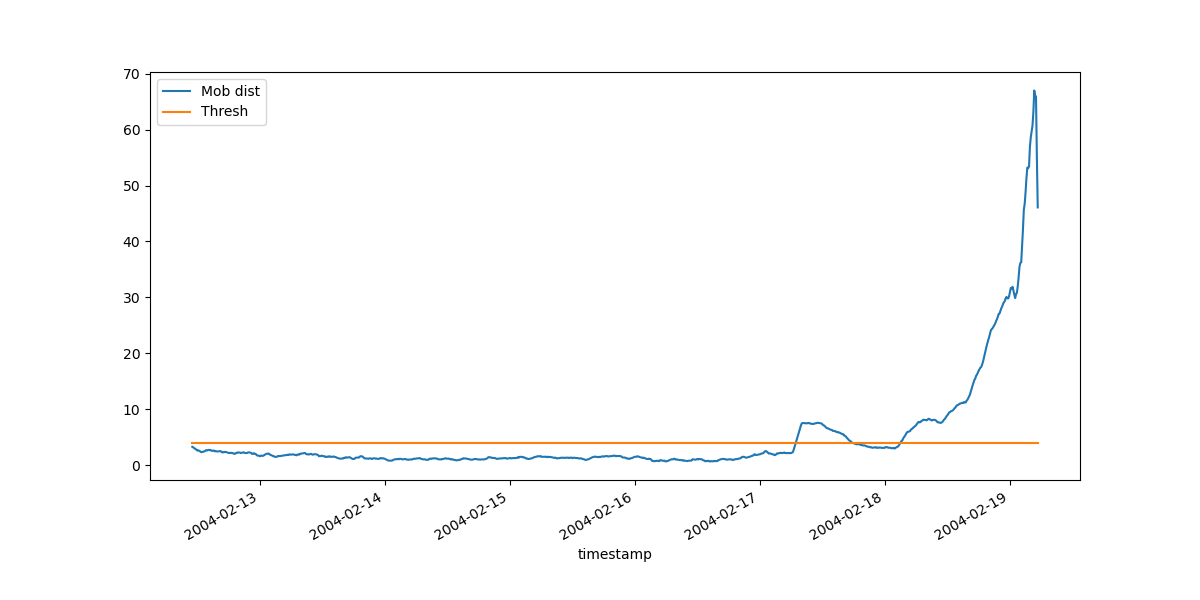

In [6]:
%matplotlib widget
df2r10.plot(figsize = (12,6))

In [33]:
dfrev3 = df3r10.merge(df3avg,left_on = df3r10.index, right_on = df3avg.index, suffixes=('_moving', '_avg'))
dfrev3.index = dfrev3.key_0
dfrev3.drop(columns = ["key_0"],inplace = True)
dfrev2 = df2r10.merge(df2avg,left_on = df2r10.index, right_on = df2avg.index, suffixes=('_moving', '_avg'))
dfrev2.index = dfrev2.key_0
dfrev2.drop(columns = ["key_0"],inplace = True)

In [34]:
dfrev2.loc[(dfrev2.Anomaly_moving == True) | (dfrev2.Anomaly_avg == True)]

,Mob dist_moving,Thresh_moving,Anomaly_moving,Mob dist_avg,Thresh_avg,Anomaly_avg
key_0,,,,,,
2004-02-12 11:02:39,3.272130,3.875547,False,5.422935,4.003783,True
2004-02-12 12:12:39,2.629335,3.875547,False,4.480093,4.003783,True
2004-02-12 13:02:39,2.374569,3.875547,False,4.122828,4.003783,True
2004-02-12 13:32:39,2.572499,3.875547,False,4.795333,4.003783,True
2004-02-12 15:12:39,2.602980,3.875547,False,5.027596,4.003783,True
...,...,...,...,...,...,...
2004-02-19 04:42:39,66.987980,3.875547,True,59.746391,4.003783,True
2004-02-19 04:52:39,66.054811,3.875547,True,47.497066,4.003783,True
2004-02-19 05:02:39,65.932662,3.875547,True,56.181286,4.003783,True


In [35]:
dfrev3.loc[(dfrev3.Anomaly_moving == True) | (dfrev3.Anomaly_avg == True)]

,Mob dist_moving,Thresh_moving,Anomaly_moving,Mob dist_avg,Thresh_avg,Anomaly_avg
key_0,,,,,,
2004-04-02 06:41:57,4.207469,4.191431,True,4.222563,4.569385,False
2004-04-02 06:51:57,4.307309,4.191431,True,4.250334,4.569385,False
2004-04-02 07:01:57,4.463203,4.191431,True,4.462421,4.569385,False
2004-04-02 07:11:57,4.498135,4.191431,True,4.460457,4.569385,False
2004-04-02 07:21:57,4.304394,4.191431,True,4.268192,4.569385,False
...,...,...,...,...,...,...
2004-04-18 00:02:55,523.578950,4.191431,True,513.898422,4.569385,True
2004-04-18 00:12:55,529.841417,4.191431,True,524.070170,4.569385,True
2004-04-18 00:22:55,536.538520,4.191431,True,542.992904,4.569385,True


In [36]:
firs_dect_avg2 = dfrev2.loc[(dfrev2.Anomaly_avg == True)].index[0]
firs_dect_rolling2 = dfrev2.loc[(dfrev2.Anomaly_moving == True)].index[0]
firs_dect_rolling2 , firs_dect_avg2

(Timestamp('2004-02-17 07:02:39'), Timestamp('2004-02-12 11:02:39'))

In [37]:
firs_dect_avg3 = dfrev3.loc[(dfrev3.Anomaly_avg == True)].index[0]
firs_dect_rolling3 = dfrev3.loc[(dfrev3.Anomaly_moving == True)].index[0]
firs_dect_rolling3 , firs_dect_avg3

(Timestamp('2004-04-02 06:41:57'), Timestamp('2004-04-03 08:21:57'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
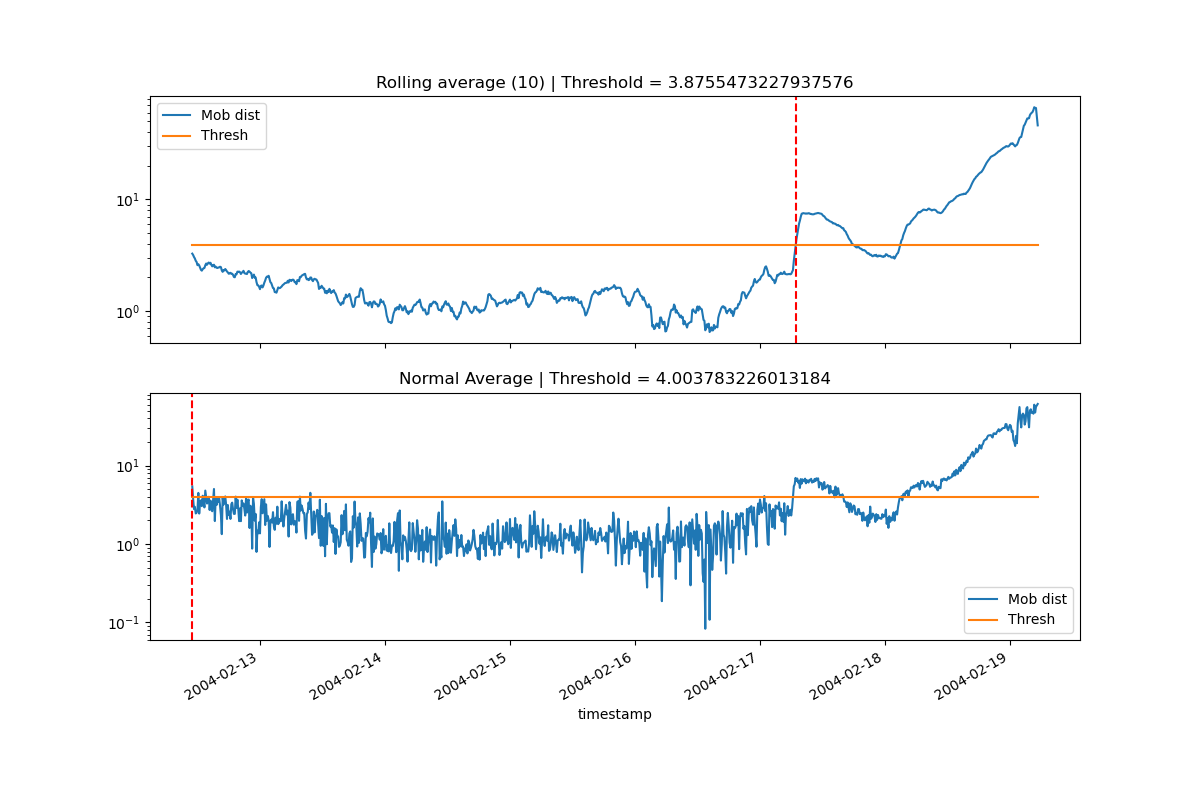

In [38]:
%matplotlib widget
fig,axes = plt.subplots(2,1,figsize = (12,8),sharex = True)
df2r10.plot(ax = axes[0],logy = True)
axes[0].axvline(firs_dect_rolling2,linestyle = "--",color = "red")
axes[0].set_title(f"Rolling average (10) | Threshold = {df2r10.Thresh.values[0]}")
df2avg.plot(ax = axes[1],logy = True)
axes[1].set_title(f"Normal Average | Threshold = {df2avg.Thresh.values[0]}")
axes[1].axvline(firs_dect_avg2,linestyle = "--",color = "red")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
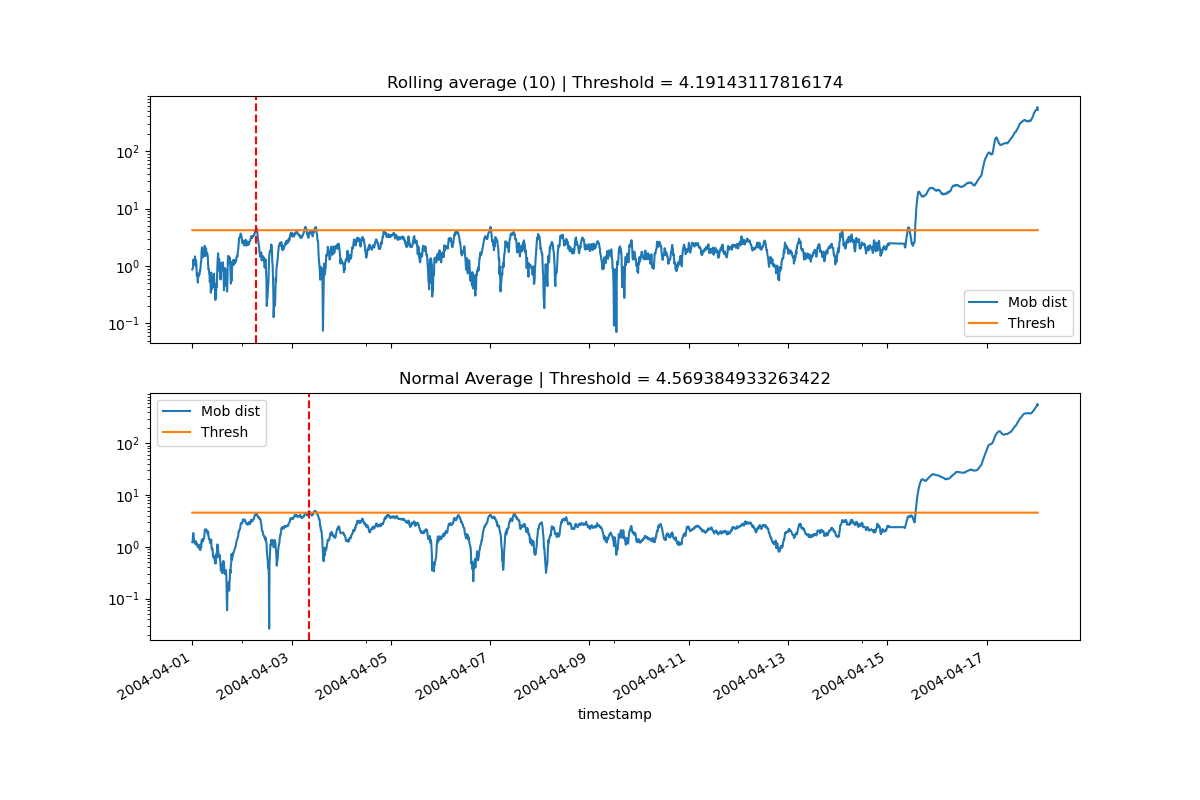

In [27]:
%matplotlib widget
fig,axes = plt.subplots(2,1,figsize = (12,8),sharex = True)
df3r10.plot(ax = axes[0],logy = True)
axes[0].axvline(firs_dect_rolling3,linestyle = "--",color = "red")
axes[0].set_title(f"Rolling average (10) | Threshold = {df3r10.Thresh.values[0]}")
df3avg.plot(ax = axes[1],logy = True)
axes[1].set_title(f"Normal Average | Threshold = {df3avg.Thresh.values[0]}")
axes[1].axvline(firs_dect_avg3,linestyle = "--",color = "red")